## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [154]:
x = np.linspace(0, 20, 50)
x


array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [164]:
y = -1*x + 2
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

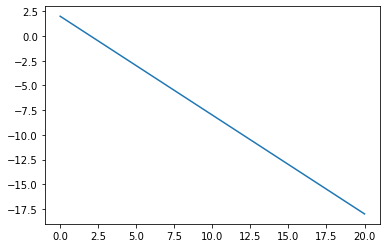

In [165]:
plt.plot(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

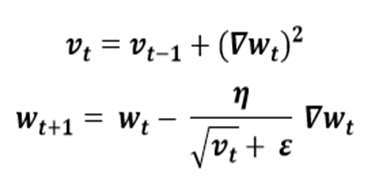

In [166]:
def Adagrad_Imp(x, y, Learning_rate, Epsilon, maxit):
    
    theta0, theta1, Vtheta0, Vtheta1 = 0, 0, 0, 0
    thetas0, thetas1, CostFuncs, Ys_pred = [], [], [], []
    
    for i in range(maxit):
        Ypred = theta0 + X*theta1
        Ys_pred.append(Ypred)
        
        LF = (1/2)*(((Ypred - y)**2).mean())
        CostFuncs.append(LF)
        
        Gredient = np.array([(Ypred - y).mean(), ((Ypred - y)*X).mean()])
        
        Vtheta0 = Vtheta0 + (Gredient[0])**2
        Vtheta1 = Vtheta1 + (Gredient[1])**2
        
        theta0 = theta0 - (Learning_rate/(np.sqrt(Vtheta0) + Epsilon))*Gredient[0]
        thetas0.append(theta0)
        
        theta1 = theta1 - (Learning_rate/(np.sqrt(Vtheta1) + Epsilon))*Gredient[1]
        thetas1.append(theta1)
        
    return {'Thetas0': thetas0, 'Thetas1': thetas1, 'Accumalated Cost function' : CostFuncs,
           'Ypredicted Values': Ys_pred, 'Theta0':theta0 , 'Theta1': theta1, 'Final Ypred': Ypred}

In [167]:
AdagradT1 = Adagrad_Imp(x, y, 0.9, 1e-8, 40)

In [168]:
r2_score(y, AdagradT1['Final Ypred'])


0.9918435911666424

In [214]:
AdagradT2 = Adagrad_Imp(x, y, 0.06, 1e-8, 40)

In [216]:
r2_score(y, AdagradT2['Final Ypred'])


0.6496883973295693

In [169]:
#loss-epochs

Text(0.5, 1.0, 'Trial one')

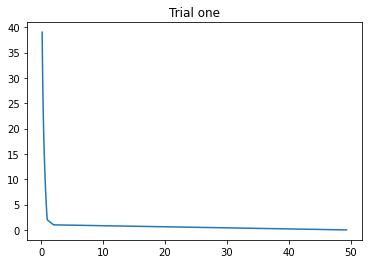

In [212]:
plt.plot(AdagradT1['Accumalated Cost function'], list(range(len(AdagradT1['Accumalated Cost function']))))
plt.title('Trial one')


Text(0.5, 1.0, 'Trial Two')

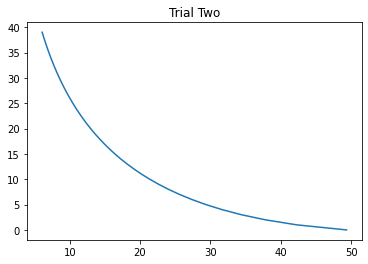

In [217]:
plt.plot(AdagradT2['Accumalated Cost function'], list(range(len(AdagradT2['Accumalated Cost function']))))
plt.title('Trial Two')


In [213]:
# Loss Thetas0

Text(0.5, 1.0, 'Trial One')

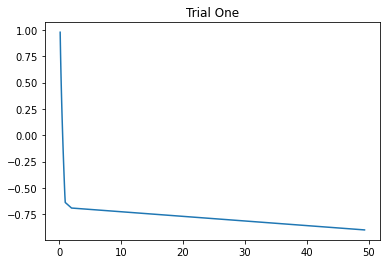

In [218]:
plt.plot(AdagradT1['Accumalated Cost function'], AdagradT1['Thetas0']  )
plt.title('Trial One')


Text(0.5, 1.0, 'Trial Two')

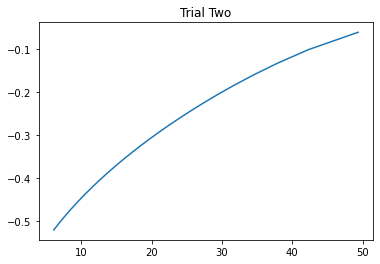

In [219]:
plt.plot(AdagradT2['Accumalated Cost function'], AdagradT2['Thetas0']  )
plt.title('Trial Two')


In [50]:
# Loss Thetas1

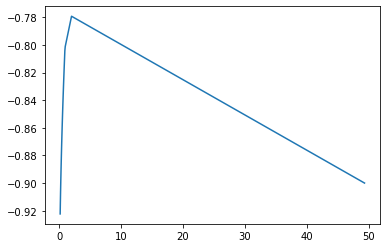

In [162]:
plt.plot(AdagradT1['Accumalated Cost function'], AdagradT1['Thetas1']  )
plt.title('Trial One')


Text(0.5, 1.0, 'Trial Two')

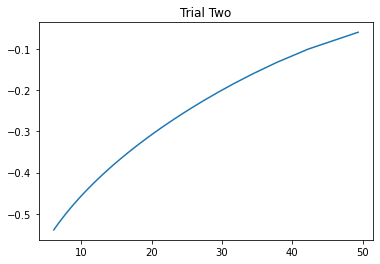

In [220]:
plt.plot(AdagradT2['Accumalated Cost function'], AdagradT2['Thetas1']  )
plt.title('Trial Two')


In [52]:
#All fitted lines per epoch (single graph)

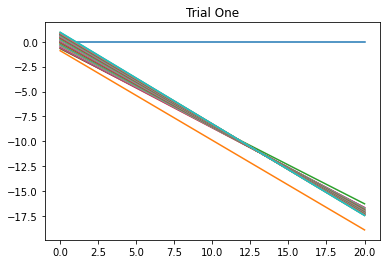

In [222]:
for i in AdagradT1['Ypredicted Values']:
    plt.plot(x,i)
    
plt.title('Trial One')
plt.show()


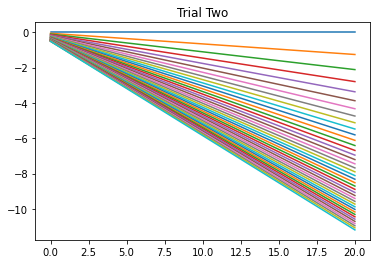

In [223]:
for i in AdagradT2['Ypredicted Values']:
    plt.plot(x,i)
    
plt.title('Trial Two')
plt.show()


In [54]:
### best fitted line

Text(0.5, 1.0, 'Trial One')

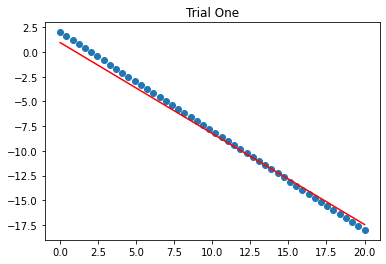

In [224]:
plt.scatter(X,y)
plt.plot(X, AdagradT1['Final Ypred'],'-r')
plt.title('Trial One')


Text(0.5, 1.0, 'Trial Two')

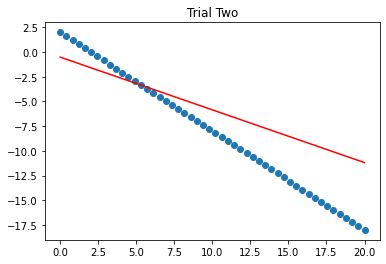

In [225]:
plt.scatter(X,y)
plt.plot(X, AdagradT2['Final Ypred'],'-r')
plt.title('Trial Two')


In [128]:
## RMSProp## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

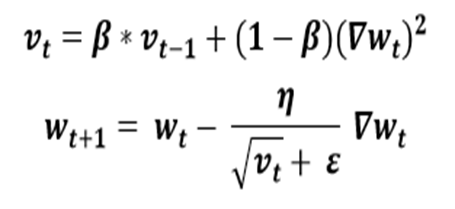

In [172]:
def RMSprop(x, y, Learning_rate, Beta, Epsilon, maxIter):
    
    theta0, theta1, Vtheta0, Vtheta1 = 0, 0, 0, 0
    thetas0, thetas1, CostFuncs, Ys_pred = [], [], [], []
    
    for i in range(maxIter):
        Ypred = theta0 + X*theta1
        Ys_pred.append(Ypred)
        
        LF = (1/2)*(((Ypred - y)**2).mean())
        CostFuncs.append(LF)
        
        Gredient = np.array([(Ypred - y).mean(), ((Ypred - y)*X).mean()])
        
        Vtheta0 = Beta*Vtheta0 + (1-Beta)*(Gredient[0])**2
        Vtheta1 = Beta*Vtheta1 + (1-Beta)*(Gredient[1])**2
        
        theta0 = theta0 - (Learning_rate/(np.sqrt(Vtheta0) + Epsilon))*Gredient[0]
        thetas0.append(theta0)
        
        theta1 = theta1 - (Learning_rate/(np.sqrt(Vtheta1) + Epsilon))*Gredient[1]
        thetas1.append(theta1)
        
    return {'Thetas0': thetas0, 'Thetas1': thetas1, 'Accumalated Cost function' : CostFuncs,
           'Ypredicted Values': Ys_pred, 'Theta0':theta0 , 'Theta1': theta1, 'Final Ypred': Ypred}

In [173]:
RMSpropT1 = RMSprop(x, y, 0.01, 0.2, 1e-8, 300)

In [174]:
r2_score(y, RMSpropT1['Final Ypred'])

0.9979601225906348

In [228]:
RMSpropT2 = RMSprop(x, y, 0.5, 0.2, 1e-8, 300)

In [229]:
r2_score(y, RMSpropT2['Final Ypred'])

0.7195148393575156

In [175]:
#Loss/Epoches

Text(0.5, 1.0, 'Trial One')

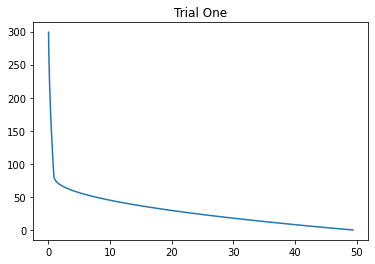

In [231]:
plt.plot(RMSpropT1['Accumalated Cost function'], list(range(len(RMSpropT1['Accumalated Cost function']))))
plt.title('Trial One')


Text(0.5, 1.0, 'Trial Two')

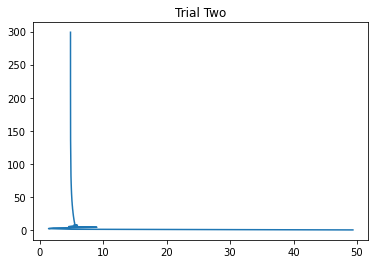

In [232]:
plt.plot(RMSpropT2['Accumalated Cost function'], list(range(len(RMSpropT2['Accumalated Cost function']))))
plt.title('Trial Two')


In [177]:
### Loss/Thetas0

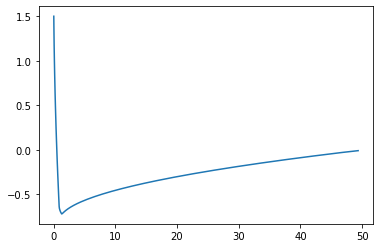

In [178]:
plt.plot(RMSpropT1['Accumalated Cost function'], RMSpropT1['Thetas0']  )
plt.title('Trial one')


Text(0.5, 1.0, 'Trial Two')

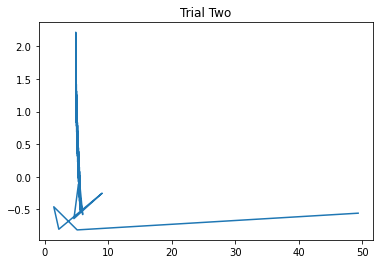

In [234]:
plt.plot(RMSpropT2['Accumalated Cost function'], RMSpropT2['Thetas0']  )
plt.title('Trial Two')


In [179]:
### Loss/Thetas1

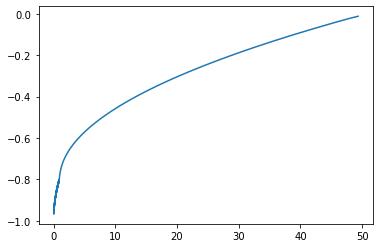

In [180]:
plt.plot(RMSpropT1['Accumalated Cost function'], RMSpropT1['Thetas1']  )
plt.title('Trial one')


Text(0.5, 1.0, 'Trial Two')

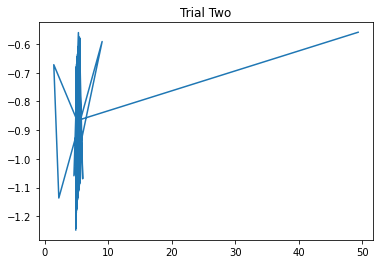

In [235]:
plt.plot(RMSpropT2['Accumalated Cost function'], RMSpropT2['Thetas1']  )
plt.title('Trial Two')


In [181]:
# All fitted lines per epoch (single graph)

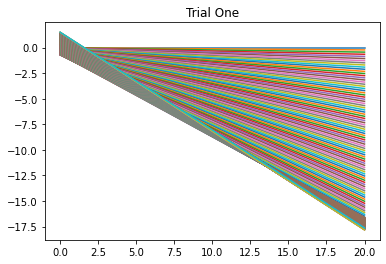

In [237]:
for i in RMSpropT1['Ypredicted Values']:
    plt.plot(x,i)
plt.title('Trial One')    
plt.show()

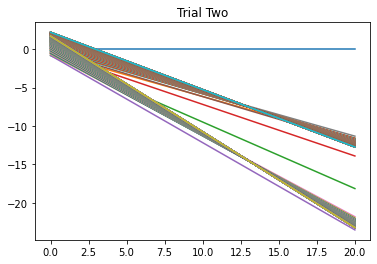

In [238]:
for i in RMSpropT2['Ypredicted Values']:
    plt.plot(x,i)
plt.title('Trial Two')    
plt.show()

In [183]:
# best fitted line

Text(0.5, 1.0, 'Trial One')

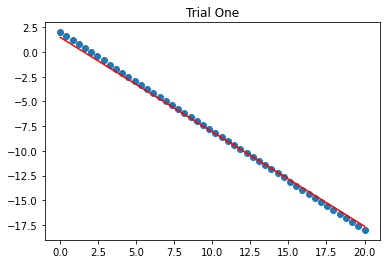

In [239]:
plt.scatter(x,y)
plt.plot(x, RMSpropT1['Final Ypred'],'-r')
plt.title('Trial One')

Text(0.5, 1.0, 'Trial Two')

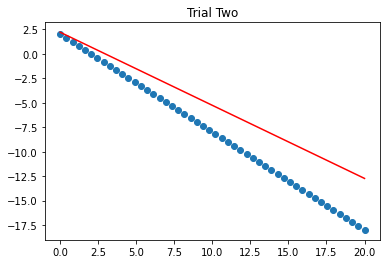

In [240]:
plt.scatter(x,y)
plt.plot(x, RMSpropT2['Final Ypred'],'-r')
plt.title('Trial Two')

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

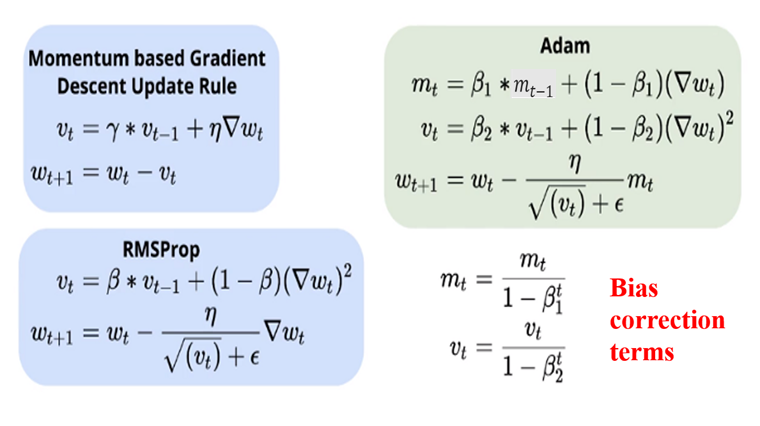

In [185]:
def ADAM(x, y, Learning_rate,Beta1, Beta2, Epsilon, maxIter):
    
    theta0, theta1, Vtheta0, Vtheta1,Mtheta0, Mtheta1 = 0, 0, 0, 0, 0, 0
    thetas0, thetas1, CostFuncs, Ys_pred = [], [], [], []
    t = 1
    for i in range(maxIter):
        Ypred = theta0 + X*theta1
        Ys_pred.append(Ypred)
        
        LF = (1/2)*(((Ypred - y)**2).mean())
        CostFuncs.append(LF)
        
        Gredient = np.array([(Ypred - y).mean(), ((Ypred - y)*X).mean()])
        
        Mtheta0 = Beta1* Mtheta0 + (1-Beta1)*Gredient[0]
        Mtheta0 = Mtheta0 / (1-(Beta1**t))
        
        Mtheta1 = Beta1* Mtheta1 + (1-Beta1)*Gredient[1]
        Mtheta1 = Mtheta1/ (1-(Beta1**t))
        t += 1
        
        
        
        Vtheta0 = Beta2*Vtheta0 + (1-Beta2)*(Gredient[0])**2
        Vtheta1 = Beta2*Vtheta1 + (1-Beta2)*(Gredient[1])**2
        
        theta0 = theta0 - (Learning_rate/(np.sqrt(Vtheta0) + Epsilon))*Mtheta0
        thetas0.append(theta0)
        
        theta1 = theta1 - (Learning_rate/(np.sqrt(Vtheta1) + Epsilon))*Mtheta1
        thetas1.append(theta1)
        
    return {'Thetas0': thetas0, 'Thetas1': thetas1, 'Accumalated Cost function' : CostFuncs,
           'Ypredicted Values': Ys_pred, 'Theta0':theta0 , 'Theta1': theta1, 'Final Ypred': Ypred}

In [241]:
ADAMT1= ADAM(x, y, 0.01, 0.09, 0.09, 1e-8, 1000)

In [242]:
r2_score(y, ADAMT1['Final Ypred'])

0.9999218032930023

In [249]:
ADAMT2= ADAM(x, y, 0.7, 0.09, 0.09, 1e-8, 1000)

In [250]:
r2_score(y, ADAMT2['Final Ypred'])

0.6168361127407787

In [188]:
#Loss/Epoches

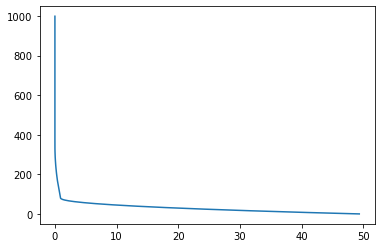

In [189]:
plt.plot(ADAM_['Accumalated Cost function'], list(range(len(ADAM_['Accumalated Cost function']))))
plt.title('Trial One')

Text(0.5, 1.0, 'Trial Two')

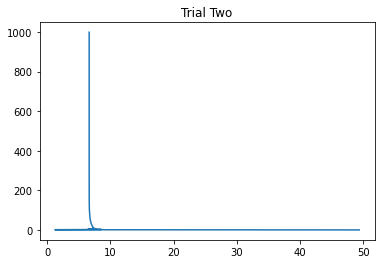

In [251]:
plt.plot(ADAMT2['Accumalated Cost function'], list(range(len(ADAMT2['Accumalated Cost function']))))
plt.title('Trial Two')

In [190]:
# Loss/Thetas0

Text(0.5, 1.0, 'Trial One')

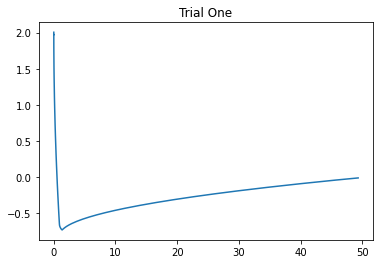

In [253]:
plt.plot(ADAMT1['Accumalated Cost function'], ADAMT1['Thetas0']  )
plt.title('Trial One')

Text(0.5, 1.0, 'Trial Two')

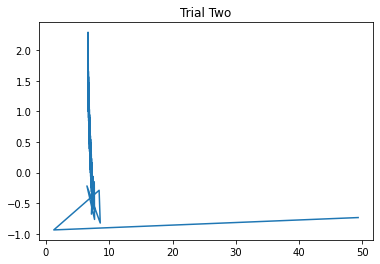

In [254]:
plt.plot(ADAMT2['Accumalated Cost function'], ADAMT2['Thetas0']  )
plt.title('Trial Two')

In [ ]:
# Loss/Thetas1

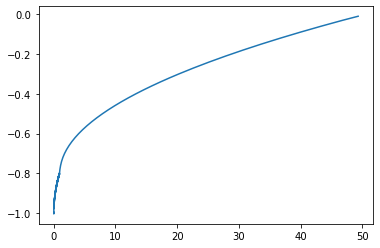

In [257]:
plt.plot(ADAMT1['Accumalated Cost function'], ADAMT1['Thetas1']  )
plt.show('Trial One')

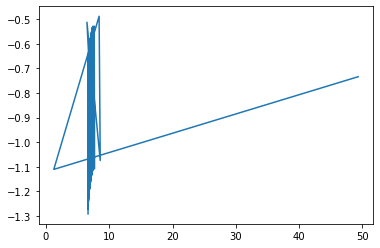

In [258]:
plt.plot(ADAMT2['Accumalated Cost function'], ADAMT2['Thetas1']  )
plt.show('Trial Two')

In [193]:
### All fitted lines per epoch (single graph)

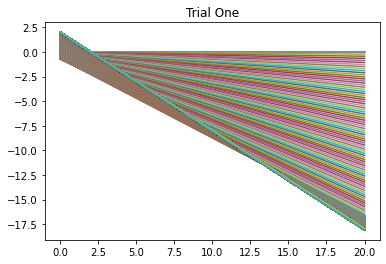

In [259]:
for i in ADAMT1['Ypredicted Values']:
    plt.plot(X,i)
    plt.title('Trial One')
plt.show()

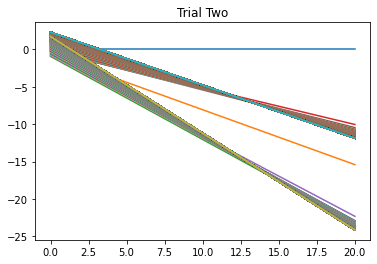

In [261]:
for i in ADAMT2['Ypredicted Values']:
    plt.plot(X,i)
    plt.title('Trial Two')
plt.show()

In [ ]:
### best fitted line

Text(0.5, 1.0, 'Trial One')

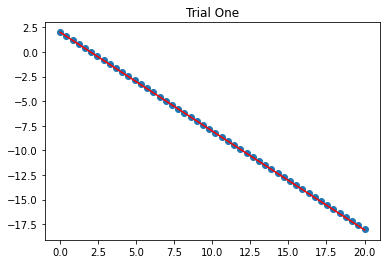

In [264]:
plt.scatter(X,y)
plt.plot(X, ADAMT1['Final Ypred'],'-r')
plt.title('Trial One')

Text(0.5, 1.0, 'Trial Two')

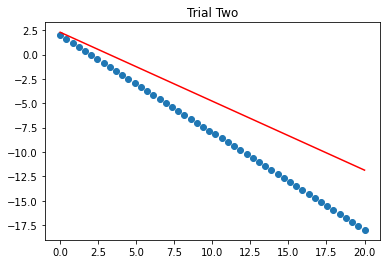

In [265]:
plt.scatter(X,y)
plt.plot(X, ADAMT2['Final Ypred'],'-r')
plt.title('Trial Two')

In [ ]:
#Comparison

In [266]:
AdagradT1 = Adagrad_Imp(x, y, 0.9, 1e-8, 40)

In [267]:
r2_score(y, AdagradT1['Final Ypred'])


0.9918435911666424

In [270]:
RMSpropT1 = RMSprop(x, y, 0.9, 0.2, 1e-8, 300)

In [271]:
r2_score(y, RMSpropT1['Final Ypred'])

0.09124346843226683

In [272]:
ADAMT1= ADAM(x, y, 0.9, 0.09, 0.09, 1e-8, 1000)

In [274]:
r2_score(y, ADAMT1['Final Ypred'])

0.3666066352232459

In [275]:
#loss-epochs

Text(0.5, 1.0, 'Adgrad Loss Epochs')

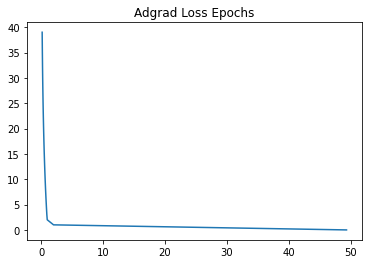

In [279]:
plt.plot(AdagradT1['Accumalated Cost function'], list(range(len(AdagradT1['Accumalated Cost function']))))
plt.title('Adgrad Loss Epochs')

Text(0.5, 1.0, 'RMS Loss Epochs')

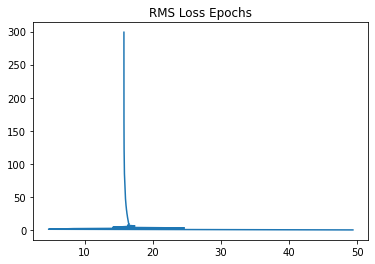

In [280]:
plt.plot(RMSpropT1['Accumalated Cost function'], list(range(len(RMSpropT1['Accumalated Cost function']))))
plt.title('RMS Loss Epochs')

Text(0.5, 1.0, 'ADAM Loss Epochs')

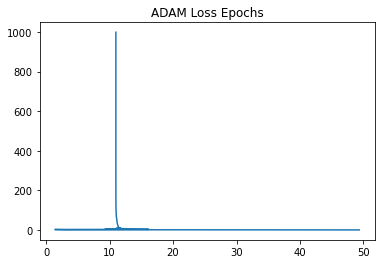

In [281]:
plt.plot(ADAMT1['Accumalated Cost function'], list(range(len(ADAMT1['Accumalated Cost function']))))
plt.title('ADAM Loss Epochs')

In [ ]:
### Loss/Thetas0


Text(0.5, 1.0, 'Adgard Loss Theta0')

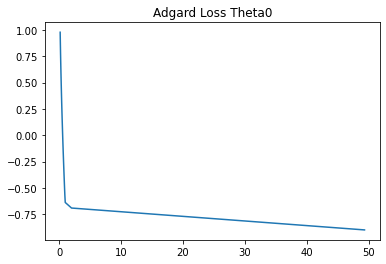

In [284]:
plt.plot(AdagradT1['Accumalated Cost function'], AdagradT1['Thetas0']  )
plt.title('Adgard Loss Theta0')

Text(0.5, 1.0, 'RMS Loss Theta0')

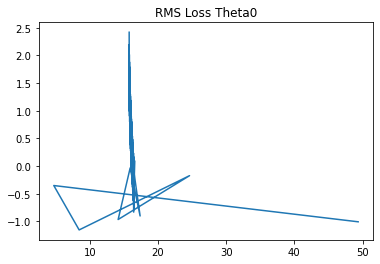

In [285]:
plt.plot(RMSpropT1['Accumalated Cost function'], RMSpropT1['Thetas0']  )
plt.title('RMS Loss Theta0')

Text(0.5, 1.0, 'Adam Loss Theta0')

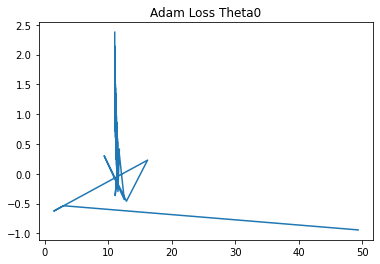

In [286]:
plt.plot(ADAMT1['Accumalated Cost function'], ADAMT1['Thetas0']  )
plt.title('Adam Loss Theta0')

In [ ]:
### Loss/Thetas1


Text(0.5, 1.0, 'Adgard Loss Theta1')

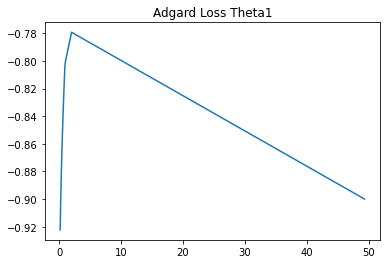

In [287]:
plt.plot(AdagradT1['Accumalated Cost function'], AdagradT1['Thetas1']  )
plt.title('Adgard Loss Theta1')

Text(0.5, 1.0, 'RMS Loss Theta1')

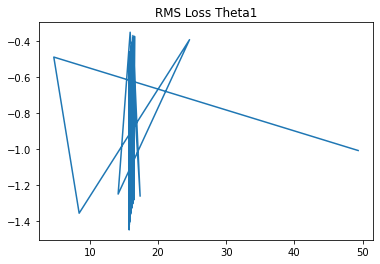

In [288]:
plt.plot(RMSpropT1['Accumalated Cost function'], RMSpropT1['Thetas1']  )
plt.title('RMS Loss Theta1')

Text(0.5, 1.0, 'Adam Loss Theta1')

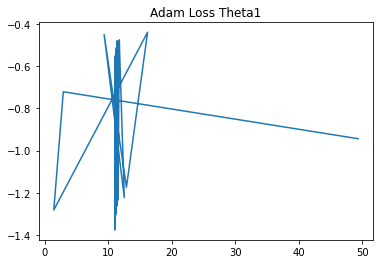

In [289]:
plt.plot(ADAMT1['Accumalated Cost function'], ADAMT1['Thetas1']  )
plt.title('Adam Loss Theta1')

In [ ]:
### All fitted lines per epoch (single graph)

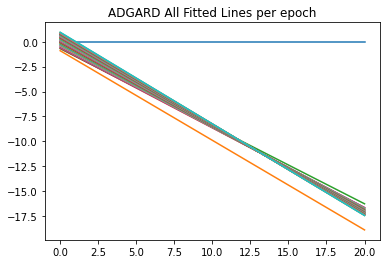

In [290]:
for i in AdagradT1['Ypredicted Values']:
    plt.plot(X,i)
plt.title('ADGARD All Fitted Lines per epoch')    
plt.show()

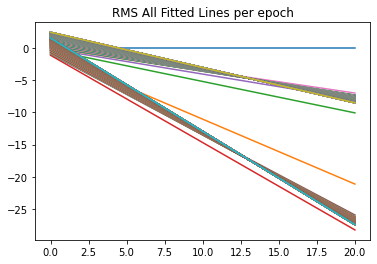

In [291]:
for i in RMSpropT1['Ypredicted Values']:
    plt.plot(X,i)
plt.title('RMS All Fitted Lines per epoch')     
plt.show()

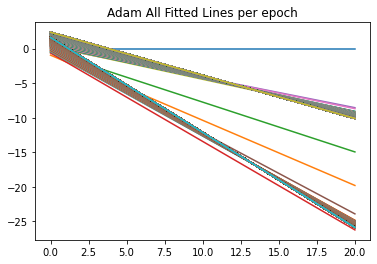

In [292]:
for i in ADAMT1['Ypredicted Values']:
    plt.plot(X,i)
plt.title('Adam All Fitted Lines per epoch')     

plt.show()

In [ ]:
### best fitted line


Text(0.5, 1.0, 'Adgrad best fitted line')

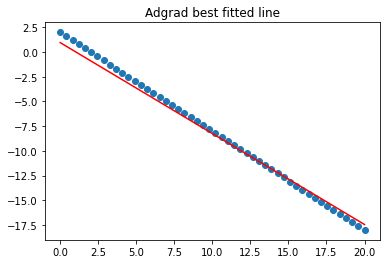

In [293]:
plt.scatter(X,y)
plt.plot(X, AdagradT1['Final Ypred'],'-r')
plt.title('Adgrad best fitted line')     


Text(0.5, 1.0, 'RMS best fitted line')

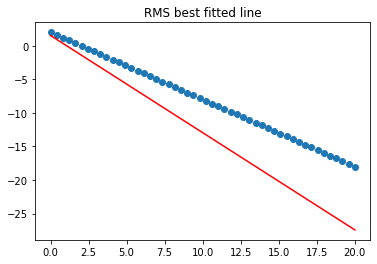

In [294]:
plt.scatter(X,y)
plt.plot(X, RMSpropT1['Final Ypred'],'-r')
plt.title('RMS best fitted line')     


Text(0.5, 1.0, 'Adam best fitted line')

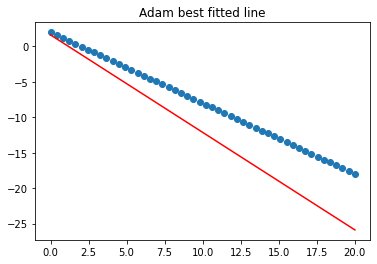

In [295]:
plt.scatter(X,y)
plt.plot(X, ADAMT1['Final Ypred'],'-r')
plt.title('Adam best fitted line')     
